In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.subplots as sp
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objects as go
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
pd.set_option('display.max_columns', None)

## Loading Data

In [21]:
Sales = pd.read_csv('sales_data.csv')
pd.set_option('display.max_columns', None)

Sales

,Order Date,Order ID,Product,Product_ean,catégorie,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin
0,2019-01-22 21:25:00,141234,iPhone,5.638009e+12,Vêtements,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,5.563320e+12,Alimentation,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750
2,2019-01-17 13:33:00,141236,Wired Headphones,2.113973e+12,Vêtements,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900
3,2019-01-05 20:33:00,141237,27in FHD Monitor,3.069157e+12,Sports,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965
4,2019-01-25 11:59:00,141238,Wired Headphones,9.692681e+12,Électronique,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950
...,...,...,...,...,...,...,...,...,...,...,...
185945,2019-12-11 20:58:00,319666,Lightning Charging Cable,6.545974e+12,Électronique,"14 Madison St, San Francisco, CA 94016",1,14.95,7.4750,14.95,7.4750
185946,2019-12-01 12:01:00,319667,AA Batteries (4-pack),5.352480e+12,Électronique,"549 Willow St, Los Angeles, CA 90001",2,3.84,1.9200,7.68,3.8400
185947,2019-12-09 06:43:00,319668,Vareebadd Phone,2.674213e+12,Alimentation,"273 Wilson St, Seattle, WA 98101",1,400.00,132.0000,400.00,268.0000
185948,2019-12-03 10:39:00,319669,Wired Headphones,5.216304e+12,Alimentation,"778 River St, Dallas, TX 75001",1,11.99,5.9950,11.99,5.9950


In [22]:
## Function to clean catetory
def category(column):
    if column=='Vêtements':
        return 'Clothing'
    elif column=='Électronique':
        return 'Electronics'
    
    else:
        return column


In [23]:
Sales.columns

Index(['Order Date', 'Order ID', 'Product', 'Product_ean', 'catégorie',
       'Purchase Address', 'Quantity Ordered', 'Price Each', 'Cost price',
       'turnover', 'margin'],
      dtype='object')

In [24]:
Sales['catégorie']=Sales['catégorie'].apply(category)

In [25]:
Sales.rename({'catégorie': 'Category'}, axis=1, inplace=True)

In [26]:
Sales['Category'].unique()

array(['Clothing', 'Alimentation', 'Sports', 'Electronics'], dtype=object)

## Data Cleaning

In [27]:
def missing_values_analysis(Sales):
    na_columns = [col for col in Sales.columns if Sales[col].isnull().sum()>0]
    n_miss = Sales[na_columns].isnull().sum().sort_values(ascending=True)
    ratio = (Sales[na_columns].isnull().sum()/ Sales.shape[0]*100).sort_values(ascending=True)
    missing_df = pd.concat([n_miss, np.round(ratio,2)],axis =1, keys=['Missing Values','Ratio'])
    missing_df =pd.DataFrame(missing_df)
    return missing_df

def check_dataframe(Sales, head=5, tail=5):
        print('SHAPE'.center(82,'~'))
        print('Rows:{}'.format(Sales.shape[0]))
        print('Columns:{}'.format(Sales.shape[1]))
        print('TYPES')
        print(Sales.dtypes)
        print("".center(82,'~'))
        print(missing_values_analysis(Sales))
        print('DUPLICATED VALUES'.center(83,'~'))
        print(Sales.duplicated().sum())
        print('QUANTILES'.center(82,'~'))
        print(Sales.quantile([0, 0.05, 0.50, 0.99,1]).T)

check_dataframe(Sales)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~SHAPE~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Rows:185950
Columns:11
TYPES
Order Date           object
Order ID              int64
Product              object
Product_ean         float64
Category             object
Purchase Address     object
Quantity Ordered      int64
Price Each          float64
Cost price          float64
turnover            float64
margin              float64
dtype: object
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Empty DataFrame
Columns: [Missing Values, Ratio]
Index: []
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~DUPLICATED VALUES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~QUANTILES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                          0.00          0.05          0.50          0.99  \
Order ID          1.412340e+05  1.501315e+05  2.303675e+05  3.178735e+05   
Product_ean       1.000083e+12  1.457559e+12  5.511235e+12  9.908212e+12   
Quantity Ordered  1.000000e

/var/folders/x6/mz0xnc7s4jd7lm8tdk0nk2140000gq/T/ipykernel_3741/1959610870.py:20: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [28]:
#Change date to datetime
Sales['Order Date'] = pd.to_datetime(Sales['Order Date'])

In [29]:
#Values for each column
def check_class(dataframe):
    nunique_df =pd.DataFrame({'Variables': dataframe.columns,
                              'Classes':[dataframe[i].nunique() \
                                for i in dataframe.columns]})
    nunique_df = nunique_df.sort_values('Classes',ascending = False)
    nunique_df = nunique_df.reset_index(drop = True)
    return nunique_df

check_class(Sales)

,Variables,Classes
0,Product_ean,185950
1,Order ID,178437
2,Order Date,142395
3,Purchase Address,140787
4,margin,54
5,turnover,53
6,Product,19
7,Price Each,17
8,Cost price,17
9,Quantity Ordered,9


## EDA

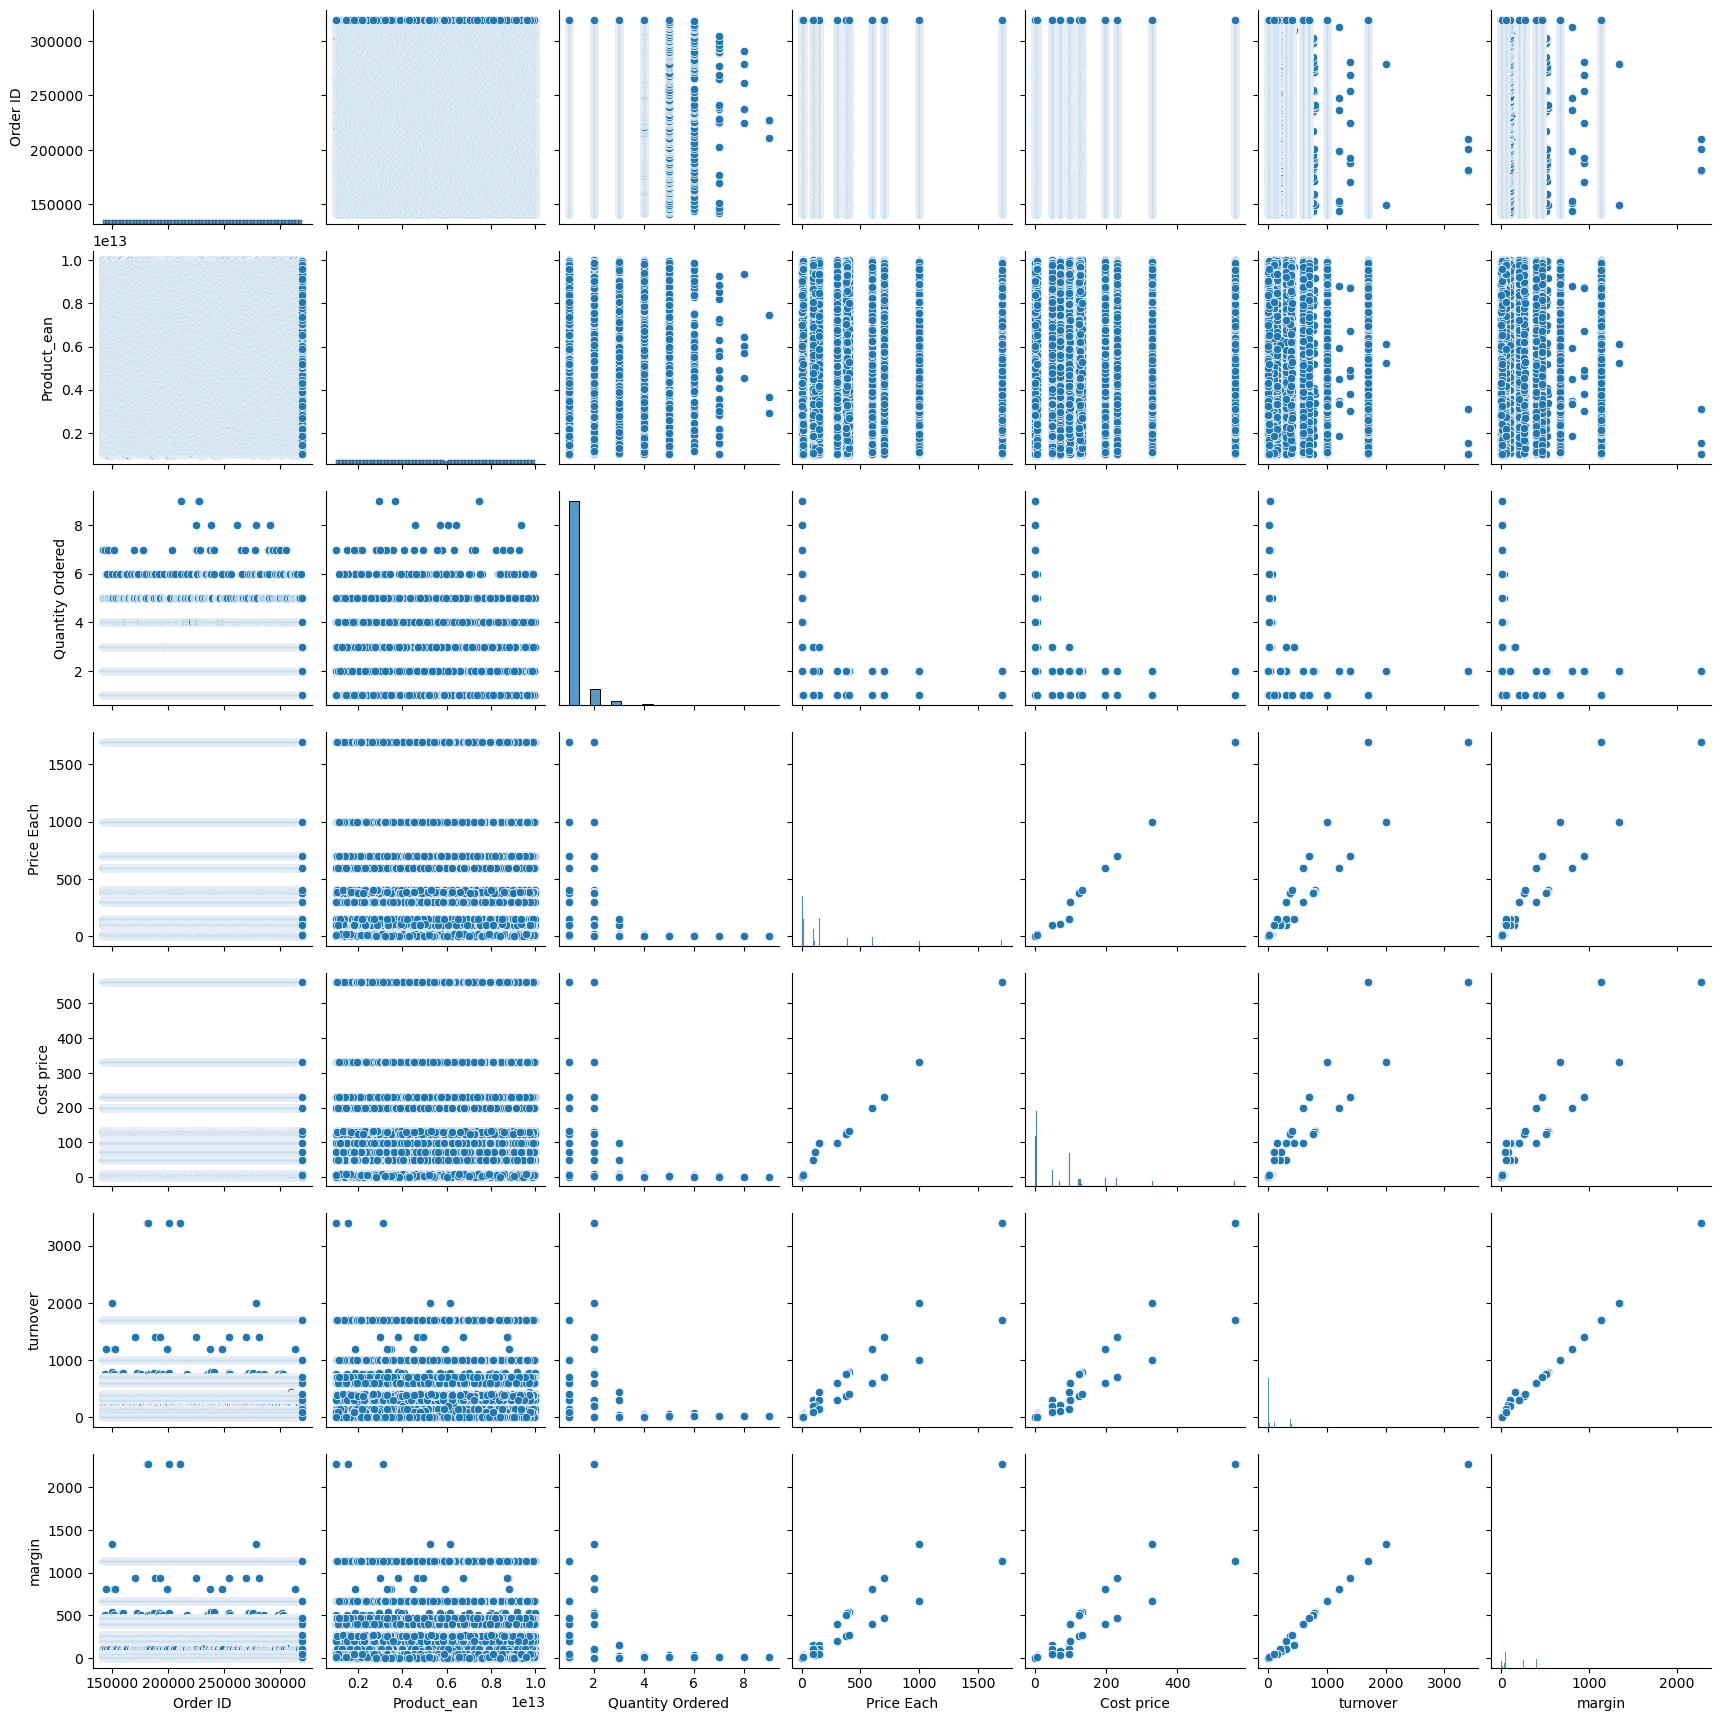

In [30]:
#Distribution of each category
sns.pairplot(Sales)

In [31]:
constraints = ['#B34D22', '#EBE00C']

def categorical_variable_summary(Sales, Category):
    fig = make_subplots(rows=1, cols=2,  # 1 row, 2 columns
                        subplot_titles=('Countplot', 'Percentage'),
                        specs=[[{'type': 'xy'}, {'type': 'domain'}]])
    
    fig.add_trace(go.Bar(y=Sales[Category].value_counts().values.tolist(),
                         x=[str(i) for i in Sales[Category].value_counts().index],
                         textfont=dict(size=14),
                         name='Category',
                         textposition='auto',
                         showlegend=False,
                         marker=dict(color=constraints[0])),  # Use the first color in 'constraints'
                   row=1, col=1)
    
    fig.add_trace(go.Pie(labels=Sales[Category].value_counts().keys(),
                         values=Sales[Category].value_counts().values,
                         textfont=dict(size=20),
                         textposition='auto',
                         showlegend=False,
                         name='Category',
                         marker=dict(colors=constraints)),  
                  row=1, col=2)
    
    fig.update_layout(title={'text': Category,
                             'y': 0.9,
                             'x': 0.5,
                             'xanchor': 'center',
                             'yanchor': 'top'},
                      template='plotly_white')  
    
    # Use display() to show the plot in Jupyter Notebook
    display(fig)    

In [32]:
categorical_variable_summary(Sales,'Category')

In [33]:
#Products under Alimentation
Alimentation = Sales.loc[Sales['Category'] =='Alimentation']

Alimentation


,Order Date,Order ID,Product,Product_ean,Category,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,5.563320e+12,Alimentation,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750
5,2019-01-29 20:22:00,141239,AAA Batteries (4-pack),2.953869e+12,Alimentation,"775 Willow St, San Francisco, CA 94016",1,2.99,1.4950,2.99,1.4950
15,2019-01-05 17:20:00,141249,27in FHD Monitor,9.643428e+12,Alimentation,"440 Cedar St, Portland, OR 97035",1,149.99,97.4935,149.99,52.4965
16,2019-01-10 11:20:00,141250,Vareebadd Phone,6.721780e+12,Alimentation,"471 Center St, Los Angeles, CA 90001",1,400.00,132.0000,400.00,268.0000
17,2019-01-24 08:13:00,141251,Apple Airpods Headphones,2.700100e+12,Alimentation,"414 Walnut St, Boston, MA 02215",1,150.00,97.5000,150.00,52.5000
...,...,...,...,...,...,...,...,...,...,...,...
185936,2019-12-05 13:22:00,319657,LG Dryer,9.144695e+12,Alimentation,"159 Lake St, Portland, OR 97035",1,600.00,198.0000,600.00,402.0000
185942,2019-12-07 08:25:00,319663,Flatscreen TV,7.218759e+12,Alimentation,"334 12th St, Atlanta, GA 30301",1,300.00,99.0000,300.00,201.0000
185944,2019-12-15 11:13:00,319665,iPhone,7.369159e+12,Alimentation,"377 1st St, Atlanta, GA 30301",1,700.00,231.0000,700.00,469.0000
185947,2019-12-09 06:43:00,319668,Vareebadd Phone,2.674213e+12,Alimentation,"273 Wilson St, Seattle, WA 98101",1,400.00,132.0000,400.00,268.0000


In [34]:
Alimentation.describe()

,Order ID,Product_ean,Quantity Ordered,Price Each,Cost price,turnover,margin
count,46342.000000,4.634200e+04,46342.000000,46342.000000,46342.000000,46342.000000,46342.000000
mean,230320.165185,5.501038e+12,1.122912,184.755793,69.925481,185.847493,115.396826
std,51475.336436,2.597341e+12,0.440007,332.302906,109.275660,332.528811,225.002359
min,141235.000000,1.001351e+12,1.000000,2.990000,1.495000,2.990000,1.495000
25%,185836.500000,3.238137e+12,1.000000,11.950000,5.975000,11.950000,5.975000
50%,230016.000000,5.503703e+12,1.000000,14.950000,7.475000,14.950000,7.475000
75%,274910.750000,7.764121e+12,1.000000,150.000000,97.500000,150.000000,52.500000
max,319669.000000,9.999806e+12,8.000000,1700.000000,561.000000,3400.000000,2278.000000


In [54]:
#check the Ordered product 

fig = go.Figure()


fig.add_trace(go.Bar(
    y=Alimentation['Product'].value_counts().values.tolist(),
    x=[str(i) for i in Alimentation['Product'].value_counts().index],
    textfont=dict(size=14),
    name='Product',
    textposition='auto',
    
    showlegend=False,
    marker=dict(color=constraints[0])

))
fig.update_layout(title={'text':'Ordered Products under Alimentation' ,
                             'y': 0.9,
                             'x': 0.5,
                             'xanchor': 'center',
                             'yanchor': 'top'},
                      template='plotly_white') 

# Display the figure
fig.show()



In [36]:
Alimentation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46342 entries, 1 to 185948
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order Date        46342 non-null  datetime64[ns]
 1   Order ID          46342 non-null  int64         
 2   Product           46342 non-null  object        
 3   Product_ean       46342 non-null  float64       
 4   Category          46342 non-null  object        
 5   Purchase Address  46342 non-null  object        
 6   Quantity Ordered  46342 non-null  int64         
 7   Price Each        46342 non-null  float64       
 8   Cost price        46342 non-null  float64       
 9   turnover          46342 non-null  float64       
 10  margin            46342 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(3)
memory usage: 4.2+ MB


In [37]:
Alimentation

,Order Date,Order ID,Product,Product_ean,Category,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,5.563320e+12,Alimentation,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750
5,2019-01-29 20:22:00,141239,AAA Batteries (4-pack),2.953869e+12,Alimentation,"775 Willow St, San Francisco, CA 94016",1,2.99,1.4950,2.99,1.4950
15,2019-01-05 17:20:00,141249,27in FHD Monitor,9.643428e+12,Alimentation,"440 Cedar St, Portland, OR 97035",1,149.99,97.4935,149.99,52.4965
16,2019-01-10 11:20:00,141250,Vareebadd Phone,6.721780e+12,Alimentation,"471 Center St, Los Angeles, CA 90001",1,400.00,132.0000,400.00,268.0000
17,2019-01-24 08:13:00,141251,Apple Airpods Headphones,2.700100e+12,Alimentation,"414 Walnut St, Boston, MA 02215",1,150.00,97.5000,150.00,52.5000
...,...,...,...,...,...,...,...,...,...,...,...
185936,2019-12-05 13:22:00,319657,LG Dryer,9.144695e+12,Alimentation,"159 Lake St, Portland, OR 97035",1,600.00,198.0000,600.00,402.0000
185942,2019-12-07 08:25:00,319663,Flatscreen TV,7.218759e+12,Alimentation,"334 12th St, Atlanta, GA 30301",1,300.00,99.0000,300.00,201.0000
185944,2019-12-15 11:13:00,319665,iPhone,7.369159e+12,Alimentation,"377 1st St, Atlanta, GA 30301",1,700.00,231.0000,700.00,469.0000
185947,2019-12-09 06:43:00,319668,Vareebadd Phone,2.674213e+12,Alimentation,"273 Wilson St, Seattle, WA 98101",1,400.00,132.0000,400.00,268.0000


In [38]:
# Striping Month to chech the turnover of the Alimentation Products by months
Alimentation['Month'] = Alimentation['Order Date'].dt.month_name()


/var/folders/x6/mz0xnc7s4jd7lm8tdk0nk2140000gq/T/ipykernel_3741/1874717602.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
# Month with most Alimentation orders 
Most = Alimentation['Month'].value_counts().sort_values()

Most



January      2424
September    2905
August       2918
February     2954
June         3366
July         3563
March        3842
May          4293
November     4401
April        4424
October      5063
December     6189
Name: Month, dtype: int64

Text(0, 0.5, 'Number of orderes')

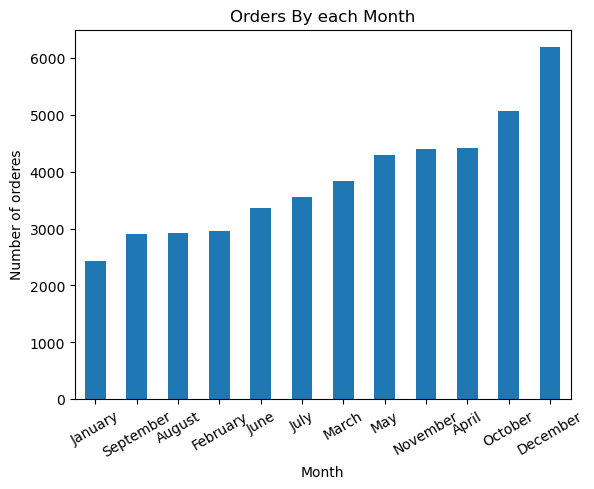

In [40]:
Most.plot(kind="bar", title="Monthly Orders")
# Rotate the x-labels by 30 degrees, and keep the text aligned horizontally
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Orders By each Month")
plt.xlabel("Month")
plt.ylabel("Number of orderes")

In [41]:
#Ordered the most in December
Most_Ord = Alimentation.loc[Alimentation['Month'] == 'December']
Product_ = Most_Ord['Product'].value_counts()

Product_

Lightning Charging Cable      747
USB-C Charging Cable          707
AAA Batteries (4-pack)        706
AA Batteries (4-pack)         668
Wired Headphones              602
Apple Airpods Headphones      533
Bose SoundSport Headphones    472
27in FHD Monitor              244
iPhone                        231
27in 4K Gaming Monitor        224
34in Ultrawide Monitor        208
Google Phone                  175
Flatscreen TV                 157
Macbook Pro Laptop            153
ThinkPad Laptop               127
20in Monitor                  124
Vareebadd Phone                75
LG Dryer                       22
LG Washing Machine             14
Name: Product, dtype: int64

In [49]:
Alimentation.set_index('Order Date', inplace=True)

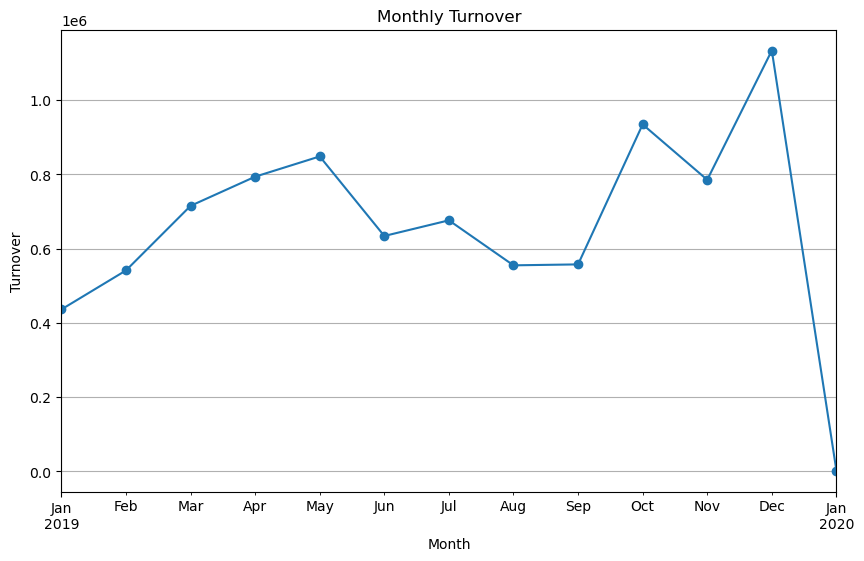

In [52]:
#Turnover for each product ordered in December 
monthly_turnover = Alimentation['turnover'].resample('M').sum()

plt.figure(figsize=(10, 6))
monthly_turnover.plot(marker='o', linestyle='-')
plt.title('Monthly Turnover')
plt.xlabel('Month')
plt.ylabel('Turnover')
plt.grid(True)
plt.show()




In [ ]:
#Margin for each Product in December

In [ ]:
# 